In [1]:
from MatlabFuncs import *
from model import *
from loadmodel import *

import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib import pyplot as plt


In [2]:
md = loadmodel('/efs/dfelikso/GrIS_Outlet_Glacier_Seasonal_dhdt/Models/SAtoES_hindcast_EN4_RACMO_seasonal_half_calve.nc')

Opening /efs/dfelikso/GrIS_Outlet_Glacier_Seasonal_dhdt/Models/SAtoES_hindcast_EN4_RACMO_seasonal_half_calve.nc for reading 
empty init


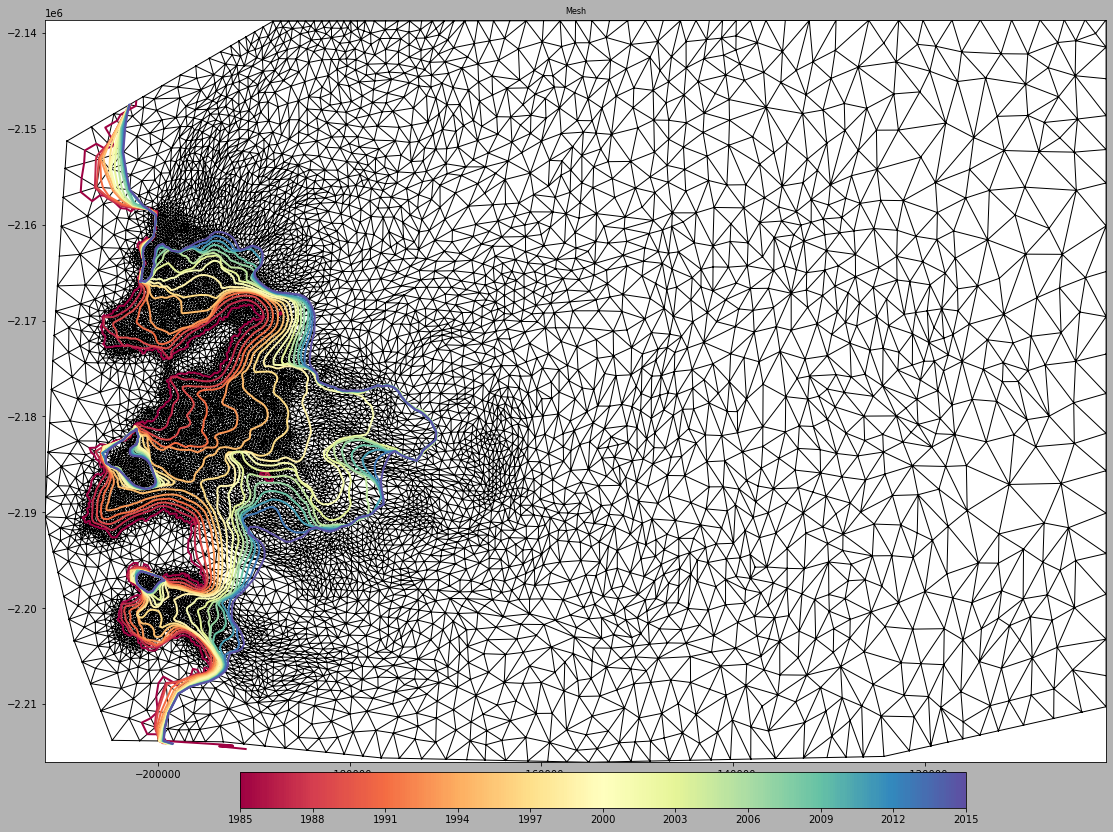

In [6]:
cmap = cmx.get_cmap('Spectral')

fig = plt.figure(figsize=(20,20))
plotmodel(md, 'data', 'mesh')

# NOTE: The code below plots every 10-th terminus position from md.results.TransientSolution.MaskIceLevelset for speed. This can be changed to every one but will run slightly slower.
n = len(md.results.TransientSolution)
for i in range(0,n,10):
    c = cmap(i/n)
    plt.tricontour(md.mesh.x, md.mesh.y, md.results.TransientSolution[i].MaskIceLevelset, 0, linewidths=2, colors=c)

ti = md.timestepping.start_time
tf = md.timestepping.final_time

norm = colors.Normalize(vmin=ti,vmax=tf)
sm = cmx.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(ti,tf,11), 
             boundaries=np.arange(ti,tf+0.1,.1),
             shrink=0.65, orientation='horizontal')
